In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys

In [2]:
data=pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [3]:
#Univeraiate Timeseries  
stock_data = data[['Date','Close']]

In [4]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [6]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


C:\Users\MONISH\AppData\Local\Temp\ipykernel_23364\1679346644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [7]:
stock_data=stock_data.set_index('Date')

# why we are converting date column as a index column
# easily retrive the data
# visulization is also simple
# those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [8]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## EDA(exploratory data analysis)
1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [9]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


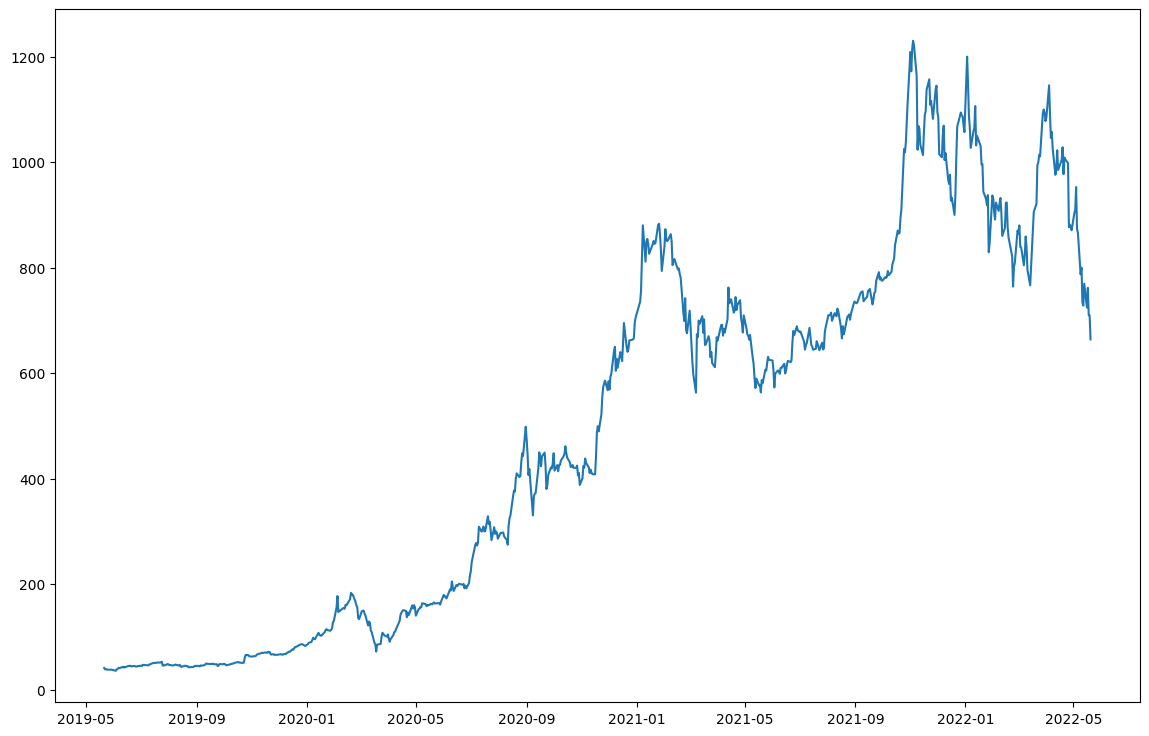

In [10]:
plt.figure(figsize=(14,9))
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

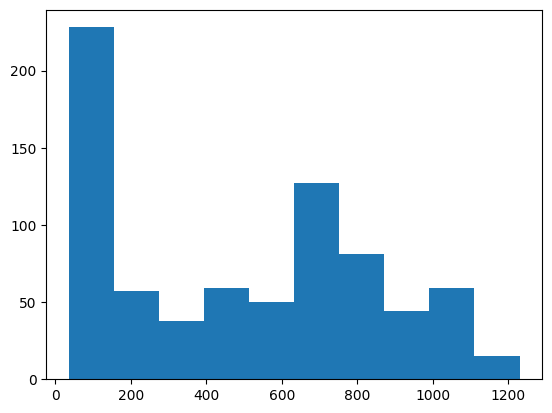

In [11]:
plt.hist(stock_data.Close)

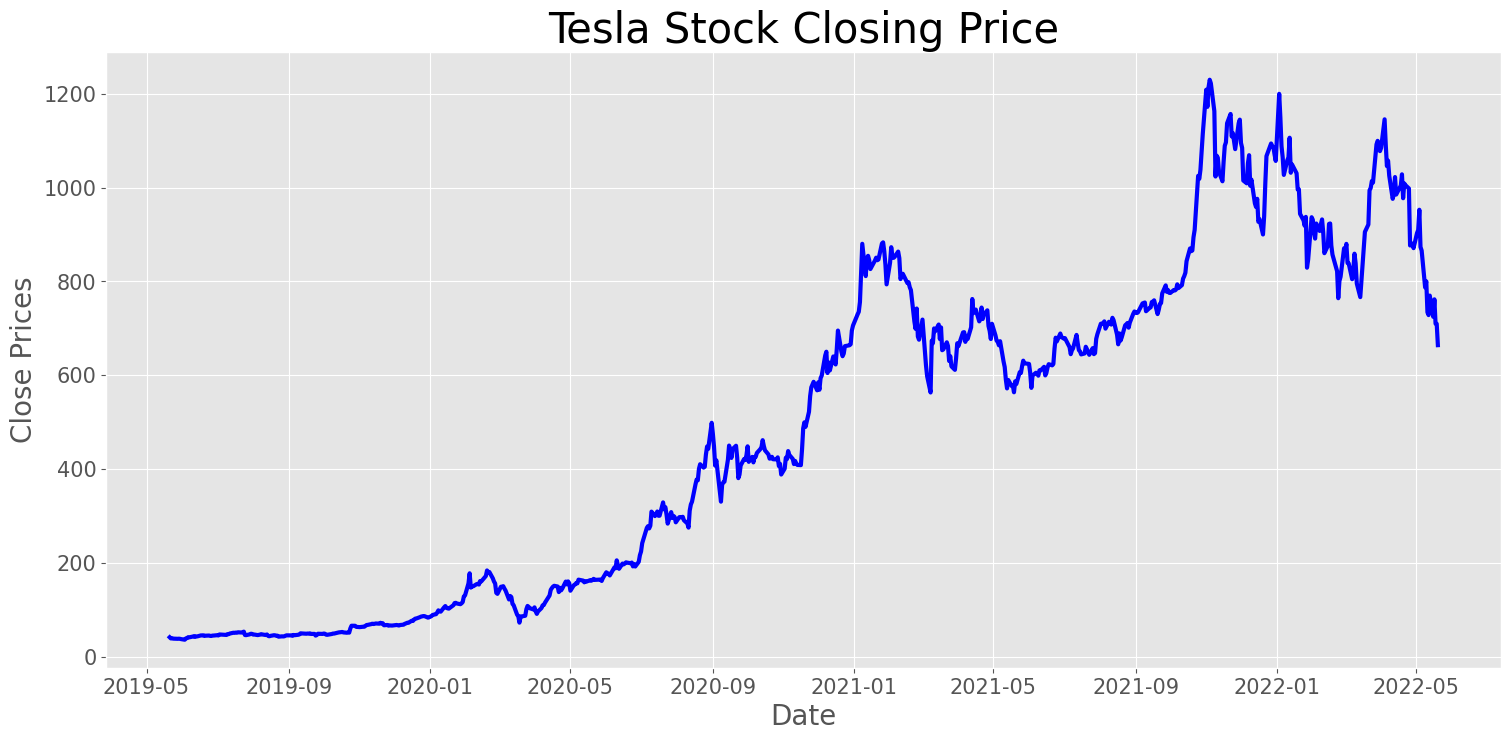

In [12]:
#plotting close price 
plt.style.use('ggplot')
plt.figure (figsize=(18,8))
plt.grid = True
plt.xlabel('Date',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'],linewidth = 3 ,color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

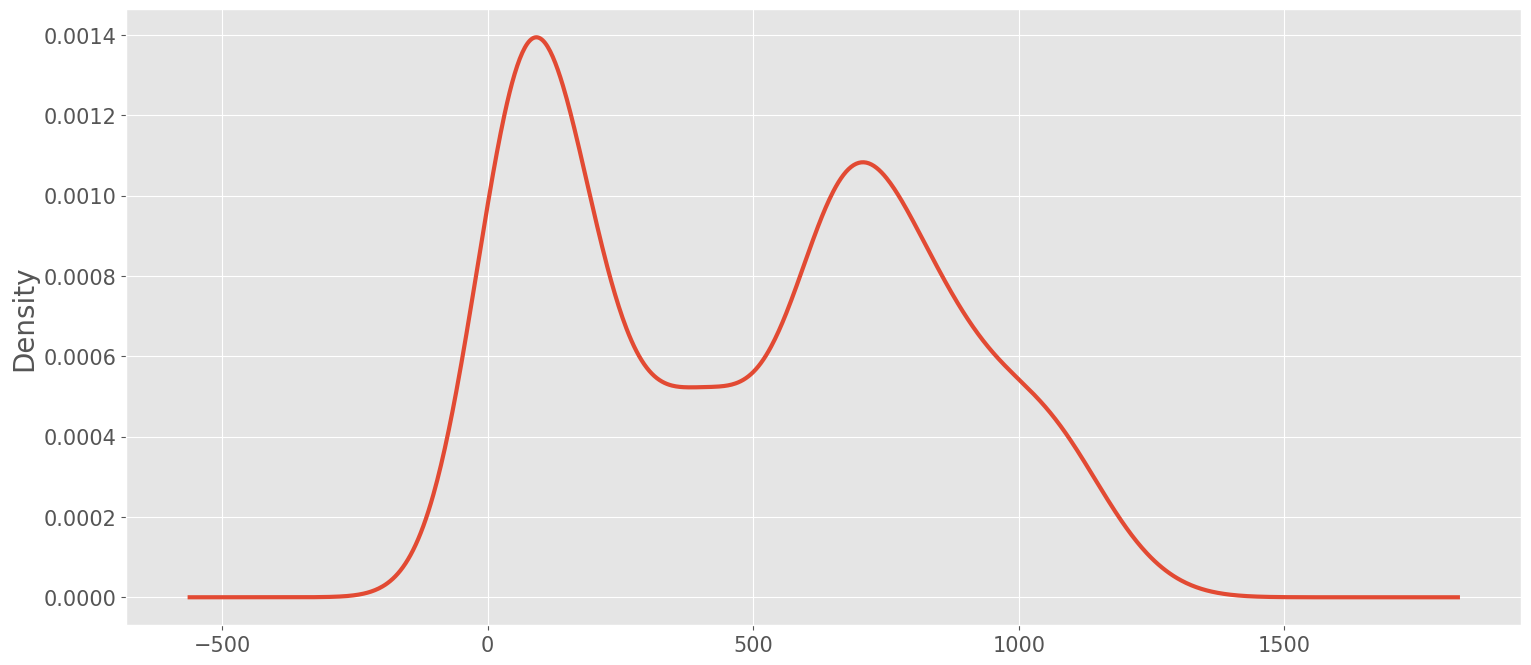

In [13]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15) 
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

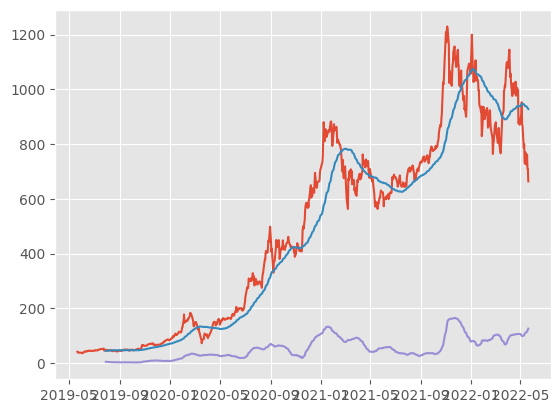

In [14]:
rolmean=stock_data["Close"].rolling(48).mean()
rolstd= stock_data['Close'].rolling(48).std()

plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [15]:
from statsmodels.tsa.stattools import adfuller 
adft = adfuller (stock_data['Close'])

pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [16]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    #plt.grid('both')
    plt.grid(True)


    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

In [17]:
test_stationarity(stock_data.Close)

TypeError: 'bool' object is not callable

<Figure size 1800x800 with 0 Axes>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

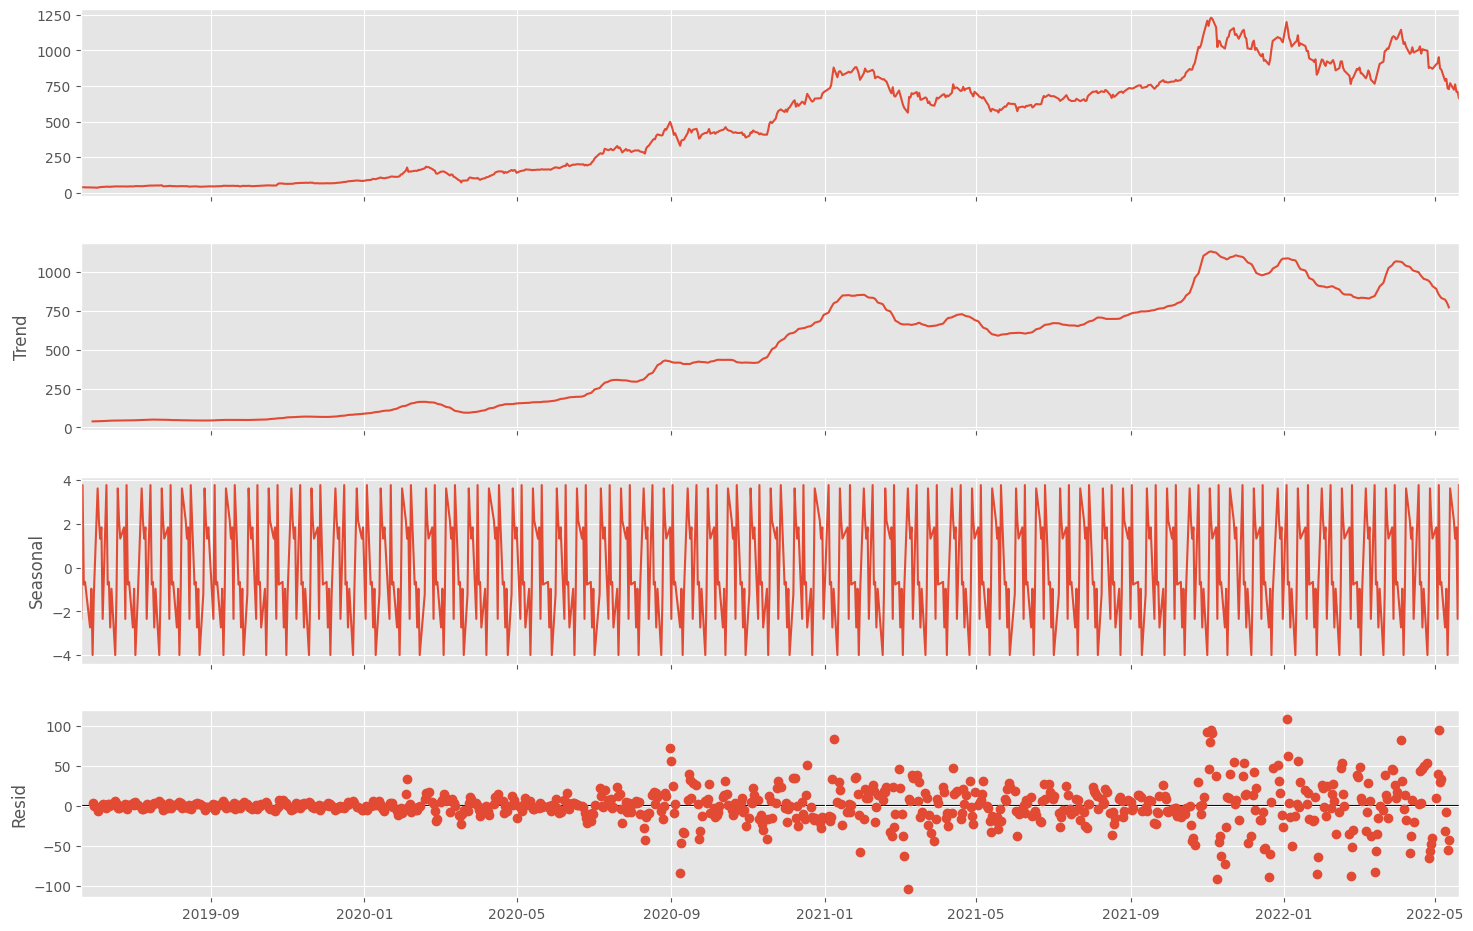

In [ ]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

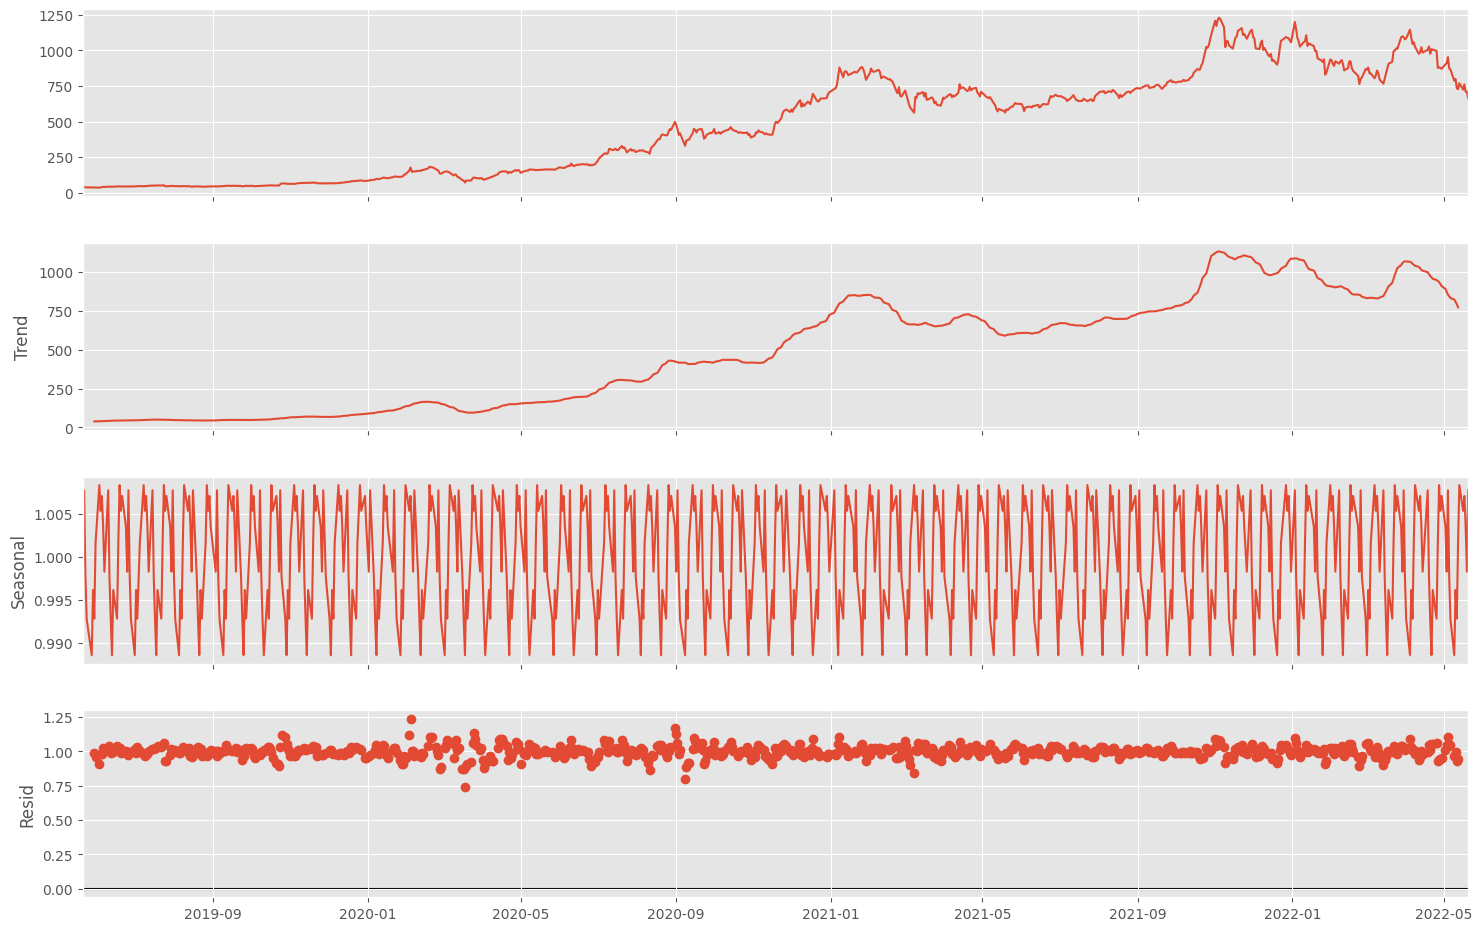

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")

fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Close'>

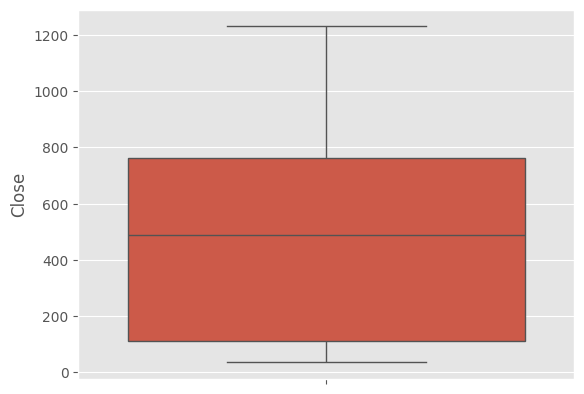

In [ ]:
import seaborn as sns
sns.boxplot(stock_data.Close)

# Model Building

In [ ]:
import statsmodels.api as sm 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [ ]:
history=[x for x in train_data]

NameError: name 'train_data' is not defined

In [ ]:
model=ARIMA(history,order=(1,1,1))
model=model.fit()

NameError: name 'ARIMA' is not defined